In [4]:
import pypsa

In [5]:
model = pypsa.Network('C:/Users/hie/pe_tan/pypsa-earth/results/networks/elec_s_25_ec_lcopt_Co2L-24h.nc')





INFO:pypsa.io:Imported network elec_s_25_ec_lcopt_Co2L-24h.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [6]:
model.export_to_csv_folder('output')

INFO:pypsa.io:Exported network output has carriers, buses, storage_units, loads, lines, global_constraints, generators, stores, links


In [7]:
lines = model.lines
buses = model.buses
generators = model.generators
generators_t = model.generators_t
load=model.loads
buses=model.buses





Cost

In [8]:
# Fuel costs for Natural Gas and Coal plants in $/kWh from the table in PSMP 2020 update
natural_gas_fuel_costs = [
    0.0460, 0.0312, 0.0339, 0.0347, 0.0339, 0.0339, 0.0339, 0.0339, 
    0.0347, 0.0339, 0.0347, 0.0312, 0.0339, 0.0339, 0.0339, 0.0339
]

coal_fuel_costs = [
    0.0212, 0.0212, 0.0212, 0.0231, 0.0231, 0.0189, 0.0189, 0.0212,
    0.0212, 0.0212, 0.0212, 0.0212, 0.0212, 0.0212, 0.0212
]

# Calculate the averages in $/kWh
avg_natural_gas_fuel_cost = sum(natural_gas_fuel_costs) / len(natural_gas_fuel_costs)
avg_coal_fuel_cost = sum(coal_fuel_costs) / len(coal_fuel_costs)

# Convert $/kWh to EUR/MWh (1 USD = 0.92 EUR, and 1 MWh = 1000 kWh)
usd_to_eur = 0.92
conversion_factor = 1000 * usd_to_eur

avg_natural_gas_fuel_cost_eur_mwh = avg_natural_gas_fuel_cost * conversion_factor
avg_coal_fuel_cost_eur_mwh = avg_coal_fuel_cost * conversion_factor

avg_natural_gas_fuel_cost_eur_mwh, avg_coal_fuel_cost_eur_mwh


(31.71125, 19.45493333333333)

In [9]:

# Display the names of the available line types
line_types = model.line_types
line_type_names = line_types.index.tolist()

print("Available line types:")
for name in line_type_names:
    print(name)

Available line types:
149-AL1/24-ST1A 10.0
149-AL1/24-ST1A 110.0
149-AL1/24-ST1A 20.0
15-AL1/3-ST1A 0.4
184-AL1/30-ST1A 110.0
184-AL1/30-ST1A 20.0
24-AL1/4-ST1A 0.4
243-AL1/39-ST1A 110.0
243-AL1/39-ST1A 20.0
305-AL1/39-ST1A 110.0
48-AL1/8-ST1A 0.4
48-AL1/8-ST1A 10.0
48-AL1/8-ST1A 20.0
490-AL1/64-ST1A 220.0
490-AL1/64-ST1A 380.0
94-AL1/15-ST1A 0.4
94-AL1/15-ST1A 10.0
94-AL1/15-ST1A 20.0
N2XS(FL)2Y 1x120 RM/35 64/110 kV
N2XS(FL)2Y 1x185 RM/35 64/110 kV
N2XS(FL)2Y 1x240 RM/35 64/110 kV
N2XS(FL)2Y 1x300 RM/35 64/110 kV
NA2XS2Y 1x185 RM/25 12/20 kV
NA2XS2Y 1x240 RM/25 12/20 kV
NA2XS2Y 1x95 RM/25 12/20 kV
NAYY 4x120 SE
NAYY 4x150 SE
NAYY 4x50 SE
Al/St 240/40 2-bundle 220.0
Al/St 240/40 3-bundle 300.0
Al/St 240/40 4-bundle 380.0
Al/St 560/50 4-bundle 750.0
HVDC XLPE 1000
HVDC Oil filled 1400


GADM data- only at Tanzania level (1)

c:\Users\hie\AppData\Local\anaconda3\envs\pypsa-earth\lib\site-packages\pyogrio\geopandas.py:265: UserWarning:

More than one layer found in 'gadm41_TZA.gpkg': 'ADM_ADM_0' (default), 'ADM_ADM_1', 'ADM_ADM_2', 'ADM_ADM_3'. Specify layer parameter to avoid this warning.



<AxesSubplot:>

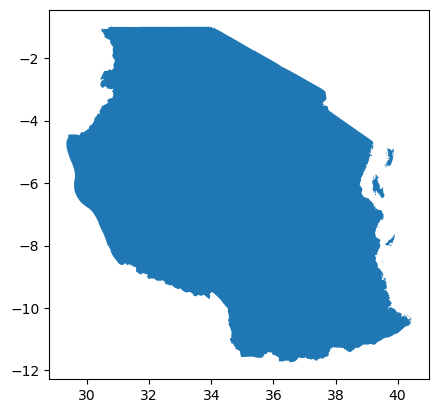

In [10]:
import geopandas as gpd

# Replace 'path_to_your_file.gpkg' with the actual path to your GPKG file
gpkg_file_path = r'C:\Users\hie\pe_tan\pypsa-earth\data\gadm\gadm41_TZA\gadm41_TZA.gpkg'

# Read the GPKG file
gdf = gpd.read_file(gpkg_file_path)

# Print the contents of the GeoDataFrame
gdf.plot()

In [11]:
model.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Combined-Cycle Gas      9.148374e+02        9.148374e+02   
            Oil                     2.662288e+02        2.662288e+02   
            Onshore Wind            1.150028e+00        1.149823e+00   
            Run of River            2.671260e+02        2.671260e+02   
            Solar                   4.534246e+03        1.443094e+01   
            load                    7.800000e+10        7.800000e+10   
Line        AC                      5.872548e+04        5.871190e+04   
Link        battery charger         3.025847e+01        0.000000e+00   
            battery discharger      3.151924e+01        0.000000e+00   
Load        -                       0.000000e+00        0.000000e+00   
StorageUnit Reservoir & Dam         2.482866e+03        2.482866e+03   
Store       Battery Storage         7.564386e+02        0.000000e+00   

                                      Supply    Withdrawal      Dispatch  \
Generator   Combined-Cycle Gas  9.940791e+03  0.000000e+00  9.940791e+03   
            Oil                 2.515737e-03  0.000000e+00  2.515737e-03   
            Onshore Wind        1.008926e+03  0.000000e+00  1.008926e+03   
            Run of River        2.340023e+06  0.000000e+00  2.340023e+06   
            Solar               6.452820e+06  0.000000e+00  6.452820e+06   
            load                1.931898e-04  0.000000e+00  1.931898e-04   
Line        AC                  2.221137e+07  2.221137e+07  0.000000e+00   
Link        battery charger     8.582512e+03  8.940117e+03 -3.576047e+02   
            battery discharger  8.239212e+03  8.582512e+03 -3.433005e+02   
Load        -                   0.000000e+00  1.044053e+07 -1.044053e+07   
StorageUnit Reservoir & Dam     1.637435e+06  0.000000e+00  1.637435e+06   
Store       Battery Storage     8.407957e+03  8.407957e+03 -7.918665e-14   

                                 Transmission  Capacity Factor    Curtailment  \
Generator   Combined-Cycle Gas       0.000000     1.240432e-03       0.000000   
            Oil                      0.000000     1.078713e-09       0.000000   
            Onshore Wind             0.000000     1.001490e-01      94.454379   
            Run of River             0.000000     9.999999e-01       0.000000   
            Solar                    0.000000     1.624577e-01  423749.358132   
            load                     0.000000     2.827388e-16       0.000000   
Line        AC                 -174429.312949     4.317622e-02       0.000000   
Link        battery charger          0.000000     3.372812e-02       0.000000   
            battery discharger       0.000000     3.108384e-02       0.000000   
Load        -                        0.000000              NaN       0.000000   
StorageUnit Reservoir & Dam          0.000000     7.528467e-02       0.000000   
Store       Battery Storage          0.000000     4.980103e-01       0.000000   

                                Capital Expenditure  Operational Expenditure  \
Generator   Combined-Cycle Gas         9.586400e+07             4.653560e+05   
            Oil                        1.067221e+07             3.963121e-01   
            Onshore Wind               1.168936e+05             2.540143e+01   
            Run of River               8.232031e+07             2.201320e+04   
            Solar                      1.781799e+08             1.240261e+05   
            load                       0.000000e+00             1.932091e+01   
Line        AC                         5.413652e+08             0.000000e+00   
Link        battery charger            7.467232e+05             9.214403e+01   
            battery discharger         0.000000e+00             8.327586e+01   
Load        -                          0.000000e+00             0.000000e+00   
StorageUnit Reservoir & Dam            0.000000e+00             1.624981e+04   
Store       Battery Storage            9.753922e+06             1.425841e-15   

           

In [12]:
model.generators

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,p_nom_max,weight,...,build_year,lifetime,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
TZ0 0 onwind,onwind,TZ0 0,0.000000,0.000000e+00,True,1.0,0.024920,101644.123324,2.558724e+04,1640.943878,...,0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
TZ0 0 solar,solar,TZ0 0,0.000000,0.000000e+00,True,1.0,0.020793,39296.472708,2.948311e+03,437.177628,...,0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
TZ0 1 onwind,onwind,TZ0 1,0.000000,0.000000e+00,True,1.0,0.024380,101644.123324,2.211876e+04,865.387965,...,0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
TZ0 1 solar,solar,TZ0 1,0.627116,6.271158e-01,True,1.0,0.019412,39296.472708,5.213513e+04,8530.185314,...,0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
TZ0 10 onwind,onwind,TZ0 10,0.000000,0.000000e+00,True,1.0,0.025034,101644.123324,3.864207e+04,3825.446410,...,0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TZ4 0 battery load,load,TZ4 0 battery,0.000000,1.000000e+09,False,1.0,100.010105,0.000000,inf,1.000000,...,0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
TZ5 0 battery load,load,TZ5 0 battery,0.000000,1.000000e+09,False,1.0,100.009442,0.000000,inf,1.000000,...,0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
TZ6 0 battery load,load,TZ6 0 battery,0.000000,1.000000e+09,False,1.0,100.009362,0.000000,inf,1.000000,...,0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0


In [13]:
grouped_generators=model.generators.groupby(by=model.generators.carrier).sum()
grouped_generators

,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,p_nom_max,weight,control,...,build_year,lifetime,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
carrier,,,,,,,,,,,,,,,,,,,,,
CCGT,TZ0 16TZ0 19TZ0 2TZ0 4TZ3 0,914.837389,9.148374e+02,0,2.90,234.064069,5.239401e+05,inf,9.000000,Slack,...,0,inf,0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
load,TZ0 0TZ0 1TZ0 10TZ0 11TZ0 12TZ0 13TZ0 14TZ0 15...,0.000000,7.800000e+10,0,78.00,7800.779674,0.000000e+00,inf,78.000000,PQPQPQPQPQPQPQPQPQPQPQPQPQPQPQPQPQPQPQPQPQPQPQ...,...,0,inf,0,0.0,0.0,0.0,0.0,0.0,78.0,78.0
oil,TZ0 2,266.228821,2.662288e+02,0,0.35,157.533191,4.008659e+04,inf,2.000000,,...,0,inf,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
onwind,TZ0 0TZ0 1TZ0 10TZ0 11TZ0 12TZ0 13TZ0 14TZ0 15...,1.149823,1.149823e+00,39,39.00,0.977169,3.964121e+06,1.267627e+06,84391.167199,SlackSlackSlackSlackSlackSlackSlack,...,0,inf,0,0.0,0.0,0.0,0.0,0.0,39.0,39.0
ror,TZ0 13TZ0 14TZ0 3,0.000000,2.671260e+02,0,2.70,0.028671,9.245111e+05,inf,267.125972,,...,0,inf,0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
solar,TZ0 0TZ0 1TZ0 10TZ0 11TZ0 12TZ0 13TZ0 14TZ0 15...,14.430937,1.443094e+01,39,39.00,0.774231,1.532562e+06,1.282660e+06,211935.570784,,...,0,inf,0,0.0,0.0,0.0,0.0,0.0,39.0,39.0


In [14]:
total_p_nom = model.generators['p_nom'].sum()
total_p_nom

78000001463.77293

<AxesSubplot:xlabel='snapshot', ylabel='MW'>

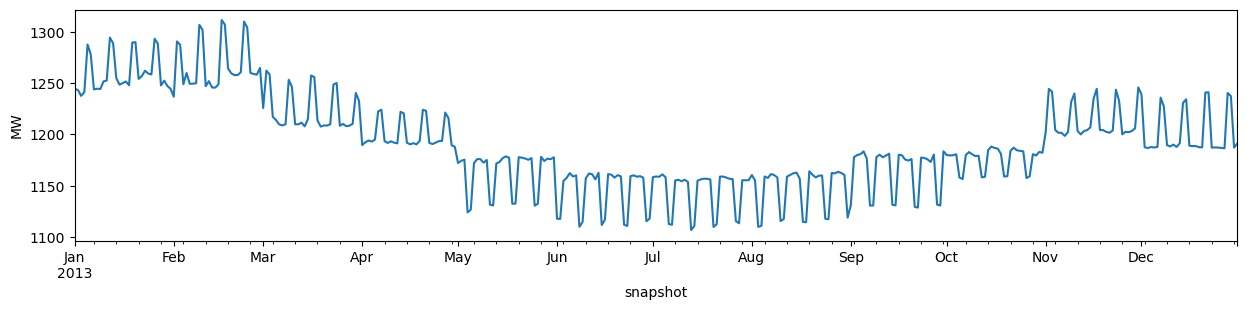

In [15]:
model.loads_t.p_set.sum(axis=1).plot(figsize=(15,3), ylabel="MW")

In [16]:
model.loads_t.p.sum()

Load
TZ0 0      7988.502088
TZ0 1     17566.590745
TZ0 10     9773.742029
TZ0 11     2820.045627
TZ0 12     3848.229270
TZ0 13    17697.403273
TZ0 14    16530.951391
TZ0 15    15073.294386
TZ0 16    10099.125538
TZ0 17    11333.997309
TZ0 18    12712.719940
TZ0 19     8013.932271
TZ0 2     62645.983557
TZ0 20    37393.853044
TZ0 21     4612.924661
TZ0 22     6193.448318
TZ0 23     8981.804502
TZ0 24     5536.821059
TZ0 3     10471.981302
TZ0 4     15868.358190
TZ0 5      9860.309349
TZ0 6     25684.115002
TZ0 7     14760.755206
TZ0 8     38604.797950
TZ0 9     20109.942857
TZ1 0      1702.887711
TZ1 1      3817.071793
TZ1 2      1373.144132
TZ1 3      2269.011480
TZ1 4       894.285429
TZ1 5       333.188693
TZ2 0      4684.782705
TZ3 0      1886.367962
TZ3 1     14431.118806
TZ4 0      2409.835882
TZ5 0       811.457759
TZ6 0       204.207554
TZ6 1       115.661379
TZ7 0      5905.289768
dtype: float64

In [17]:
model.iplot(mapbox='osm')

{'data': [Scattermapbox({
      'lat': [-7.7772, -6.738275],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [37.8406, 38.37895],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-1.78215, -2.543],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [33.84715, 32.967],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-2.6887, -3.06935],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [31.00325, 32.3417],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-3.9490499999999997, -3.40466],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [37.6031, 36.78906],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-3.9490499999999997, -5.2438666666666665],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [37.6031, 38.78313333333333],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
 

c:\Users\hie\AppData\Local\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



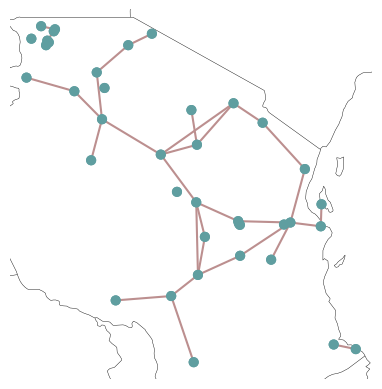

In [18]:
model.plot();


In [19]:
for c in model.iterate_components(list(model.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 78 entries
Component 'Carrier' has 15 entries
Component 'GlobalConstraint' has 1 entries
Component 'Line' has 35 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 78 entries
Component 'Load' has 39 entries
Component 'Generator' has 165 entries
Component 'StorageUnit' has 4 entries
Component 'Store' has 39 entries


In [20]:
model.lines

,num_parallel,v_nom,bus0,bus1,length,dc,geometry,bounds,carrier,type,...,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
0,1.052632,380.0,TZ0 0,TZ0 24,162.364114,False,"MULTILINESTRING ((37.8406 -7.7772, 37.84062620...","MULTIPOINT ((37.8406 -7.7772), (37.84062620000...",AC,Al/St 240/40 4-bundle 380.0,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
1,0.260526,380.0,TZ0 1,TZ0 19,161.642049,False,"MULTILINESTRING ((32.966 -2.544, 32.9665192999...","MULTIPOINT ((32.966 -2.544), (32.9665192999998...",AC,Al/St 240/40 4-bundle 380.0,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
10,0.289474,380.0,TZ0 13,TZ0 5,193.187013,False,MULTILINESTRING ((31.214346899999867 -2.992338...,"MULTIPOINT ((31.2136 -2.9904), (31.21434689999...",AC,Al/St 240/40 4-bundle 380.0,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
11,0.390789,380.0,TZ0 14,TZ0 4,135.922103,False,MULTILINESTRING ((37.31315690000024 -3.4221233...,MULTIPOINT ((37.31315690000024 -3.422123300000...,AC,Al/St 240/40 4-bundle 380.0,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
12,0.260526,380.0,TZ0 14,TZ0 8,243.140635,False,MULTILINESTRING ((38.61745752374756 -5.2964469...,MULTIPOINT ((37.73768980000001 -4.071734399999...,AC,Al/St 240/40 4-bundle 380.0,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
13,0.868421,380.0,TZ0 15,TZ0 19,183.052640,False,MULTILINESTRING ((32.966108499999876 -2.544362...,MULTIPOINT ((32.966108499999876 -2.54436240000...,AC,Al/St 240/40 4-bundle 380.0,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
14,2.605263,380.0,TZ0 15,TZ0 22,265.886042,False,"LINESTRING (34.7563 -4.8406, 34.75503799999999...","MULTIPOINT ((34.7563 -4.8406), (33.5148 -3.6219))",AC,Al/St 240/40 4-bundle 380.0,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
15,0.868421,380.0,TZ0 15,TZ0 5,152.706882,False,MULTILINESTRING ((32.49089980000009 -3.2207166...,"MULTIPOINT ((32.4905 -3.2208), (32.49089980000...",AC,Al/St 240/40 4-bundle 380.0,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
16,0.260526,380.0,TZ0 15,TZ0 9,164.888132,False,MULTILINESTRING ((33.142309100000034 -4.072335...,"MULTIPOINT ((32.8102 -4.9986), (33.14230910000...",AC,Al/St 240/40 4-bundle 380.0,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [21]:
model.storage_units

,carrier,bus,p_nom,max_hours,p_min_pu,efficiency_dispatch,efficiency_store,cyclic_state_of_charge,control,marginal_cost,...,sign,marginal_cost_quadratic,capital_cost,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,
TZ0 0 hydro,hydro,TZ0 0,2115.000000,203.135555,0.0,0.9,0.0,True,,0.009920,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
TZ0 11 hydro,hydro,TZ0 11,200.000000,203.135555,0.0,0.9,0.0,True,,0.010793,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
TZ0 12 hydro,hydro,TZ0 12,80.000000,203.135555,0.0,0.9,0.0,True,,0.009380,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
TZ0 8 hydro,hydro,TZ0 8,87.866242,203.135555,0.0,0.9,0.0,True,,0.009412,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0


Time varying components

<AxesSubplot:xlabel='snapshot'>

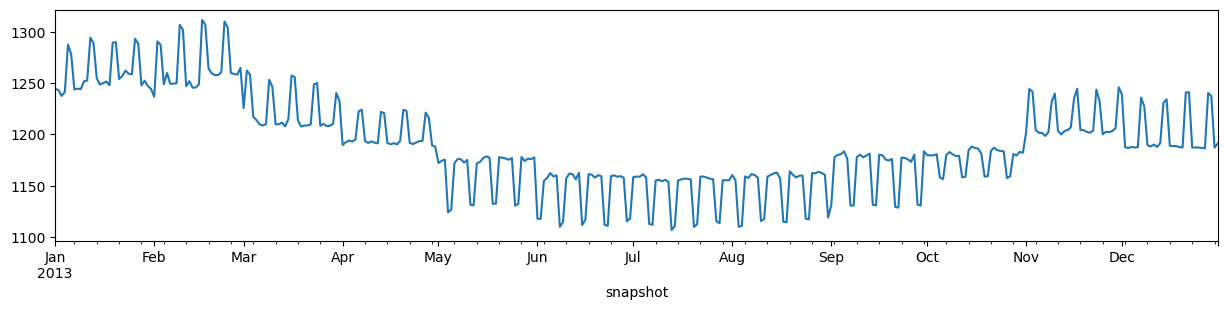

In [22]:
model.loads_t.p_set.sum(axis=1).plot(figsize=(15,3))  

In [31]:
print(model.loads_t.p_set.sum())

Load
TZ0 0      7988.502088
TZ0 1     17566.590745
TZ0 10     9773.742029
TZ0 11     2820.045627
TZ0 12     3848.229270
TZ0 13    17697.403273
TZ0 14    16530.951391
TZ0 15    15073.294386
TZ0 16    10099.125538
TZ0 17    11333.997309
TZ0 18    12712.719940
TZ0 19     8013.932271
TZ0 2     62645.983557
TZ0 20    37393.853044
TZ0 21     4612.924661
TZ0 22     6193.448318
TZ0 23     8981.804502
TZ0 24     5536.821059
TZ0 3     10471.981302
TZ0 4     15868.358190
TZ0 5      9860.309349
TZ0 6     25684.115002
TZ0 7     14760.755206
TZ0 8     38604.797950
TZ0 9     20109.942857
TZ1 0      1702.887711
TZ1 1      3817.071793
TZ1 2      1373.144132
TZ1 3      2269.011480
TZ1 4       894.285429
TZ1 5       333.188693
TZ2 0      4684.782705
TZ3 0      1886.367962
TZ3 1     14431.118806
TZ4 0      2409.835882
TZ5 0       811.457759
TZ6 0       204.207554
TZ6 1       115.661379
TZ7 0      5905.289768
dtype: float64


Total annual system costs

In [30]:
model.objective/1e6 #million euroes per year

188.79031086912156

Transmission line expansion

In [24]:
model.lines.s_nom   #lines nominal capacities

Line
0      1787.476433
1       442.400417
10      491.556019
11      663.600626
12      442.400417
13     1474.668058
14     4424.004173
15     1474.668058
16      442.400417
17     1474.668058
18     8311.765415
19     2949.336115
2       442.400417
20     1474.668058
21     1474.668058
22      491.556019
23      147.466806
24     4879.810663
25      491.556019
26    10724.858600
27      442.400417
28      110.600104
29      442.400417
3       221.200209
30       36.866701
31      110.600104
32      110.600104
33      442.400417
34      491.556019
4      1474.668058
5      1474.668058
6      2949.336115
7      2949.336115
8      1474.668058
9      1474.668058
Name: s_nom, dtype: float64

In [25]:
model.lines.s_nom_opt #optimized transmission capacity expansion by x 

Line
0      1787.476438
1       442.400418
10      491.556027
11      663.600635
12      442.400425
13     1474.668061
14     4424.004174
15     1474.668062
16      442.400425
17     1474.668061
18     8311.765416
19     2949.336132
2       442.400466
20     1474.668091
21     1474.668062
22      491.556024
23      161.050435
24     4879.810671
25      491.556089
26    10724.858602
27      442.400433
28      110.600211
29      442.400516
3       221.200219
30       36.866819
31      110.600122
32      110.600115
33      442.400418
34      491.556145
4      1474.668058
5      1474.668062
6      2949.336117
7      2949.336115
8      1474.668081
9      1474.668064
Name: s_nom_opt, dtype: float64

Optimal generator/storage

In [26]:
model.generators.groupby ('carrier').p_nom_opt.sum() #MW

carrier
CCGT      9.148374e+02
load      7.800000e+10
oil       2.662288e+02
onwind    1.150028e+00
ror       2.671260e+02
solar     4.534246e+03
Name: p_nom_opt, dtype: float64

In [27]:
model.storage_units.groupby ('carrier').p_nom_opt.sum() #MW

carrier
hydro    2482.866242
Name: p_nom_opt, dtype: float64

<AxesSubplot:xlabel='snapshot'>

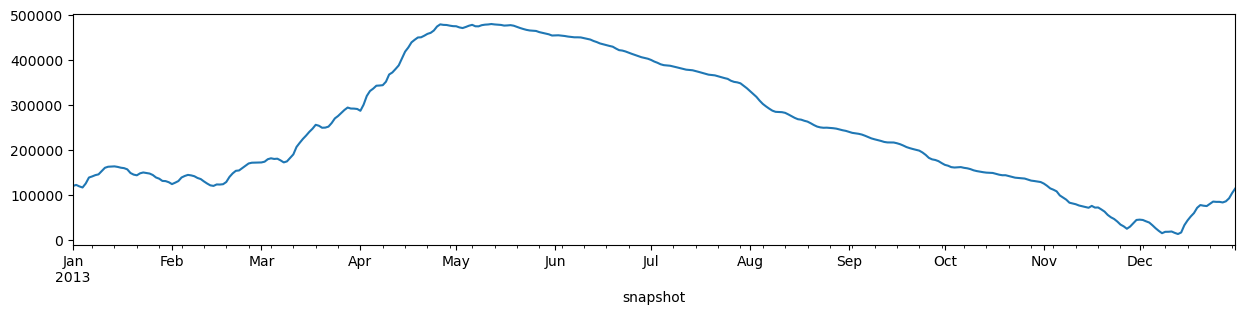

In [28]:
(model.storage_units_t.state_of_charge.filter(like='hydro',axis=1).sum(axis=1)).plot(figsize=(15,3))

Plotting networks with line loading

c:\Users\hie\AppData\Local\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



(3400042.6175467735, 4526957.096122331, -1236465.6960738087, -86518.2499327938)

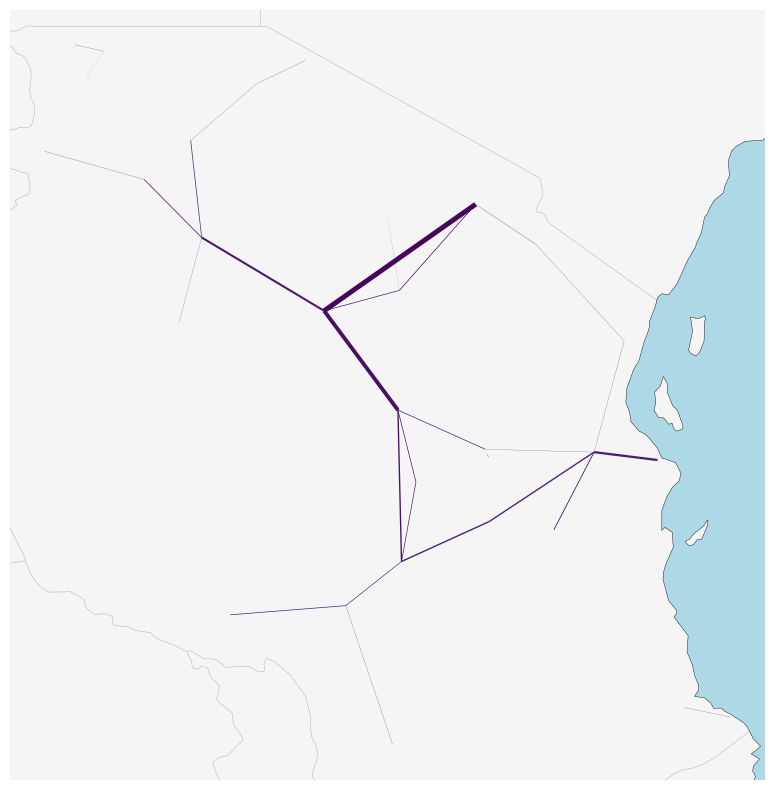

In [29]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

loading= (model.lines_t.p0.abs().mean().sort_index()/(model.lines.s_nom_opt*model.lines.s_max_pu).sort_index()).fillna(0)

fig, ax = plt.subplots(figsize=(10,10), subplot_kw={"projection":ccrs.Mercator()})

model.plot(ax=ax, 
           bus_colors="blue", 
           branch_components=['Line'], 
           line_widths=model.lines.s_nom_opt/3e3,
           line_colors=loading, 
           bus_sizes=0, 
           color_geomap=True)

ax.axis('off')